In [1]:
import or_gym
from or_gym.benchmarks.newsvendor.nv_benchmark import *
from or_gym.benchmarks.newsvendor.onv_benchmark import *
import matplotlib.pyplot as plt
plt.style.use('c:/users/hd/.matplotlib/stylelib/orgym.py')
import pyomo.environ as pe

In [2]:
#create environments for 4 cases
env1_dfo=or_gym.make("NewsVendor-v2",env_config={'seed_int':20})
env1_mip=or_gym.make("NewsVendor-v2",env_config={'seed_int':20})
env1_mip_pi=or_gym.make("NewsVendor-v2")
env1_dfo_online=or_gym.make("NewsVendor-v2")
env1_mip_online=or_gym.make("NewsVendor-v2")

C:\ProgramData\Miniconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
#run optimizations for backlog scenario
env1_dfo_results = optimize_nv_dfo(env1_dfo)

env1_mip_model, env1_mip_results = optimize_nv_mip(env1_mip,
                                                   solver_kwargs={'TimeLimit':3600},
                                                   warmstart=True,
                                                   warmstart_kwargs={'mapping_env': env1_dfo,
                                                                     'mapping_z':env1_dfo_results.zopt})
#DFO
#reset env to run simulation with new demand profile and with base stock levels found
env1_dfo=or_gym.make("NewsVendor-v2")
#run simulation
for t in range(env1_dfo.num_periods):
    #take a step in the simulation using base stock policy
    env1_dfo.step(action=env1_dfo.base_stock_action(z=env1_dfo_results.zopt)) 

#MIP
zopt = list(env1_mip_model.z.get_values().values()) #extract optimal base stock levels
#reset env to run simulation with new demand profile and with base stock levels found
env1_mip=or_gym.make("NewsVendor-v2")
#run simulation
for t in range(env1_mip.num_periods):
    #take a step in the simulation using base stock policy
    env1_mip.step(action=env1_mip.base_stock_action(z=zopt)) 

   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.83239377e+00,  7.02575134e+00,  2.42650276e+00],
       [-7.81588333e-04,  2.00000000e+00,  0.00000000e+00]])
    fopt: 0.4403902050025434
     fun: -0.43897082971336354
 message: 'Optimization terminated successfully.'
    nfev: 822
     nit: 10
  status: 0
 success: True
       x: array([ 87.00028331, 132.00001828,  82.47449046])
    xopt: array([ 87., 133.,  83.])
    zopt: array([ 87., 220., 303.])
Academic license - for non-commercial use only
Read LP format model from file C:\Users\HD\AppData\Local\Temp\tmp6ia3pov0.pyomo.lp
Reading time = 0.02 seconds
x3343: 4147 rows, 2980 columns, 13729 nonzeros
Read MIP start from file C:\Users\HD\AppData\Local\Temp\tmpv3q2h006.gurobi.mst
Changed value of parameter TimeLimit to 3600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 4147 rows, 2980 columns and 13729 nonzeros
Variable types: 1897 continuous, 1083 integer (1080 binary)
C

In [6]:
import pickle
NV_envs = {'DFO':env1_dfo,
           'DFO zopt':env1_dfo_results.zopt,
           'MIP':env1_mip,
           'MIP zopt':list(env1_mip_model.z.get_values().values())}
file_env = open('NV_envs_LS_part1.obj','wb')
pickle.dump(NV_envs,file_env)

In [7]:
env1_mip_pi_model, env1_mip_pi_results = optimize_nv_pi_mip(env1_mip_pi,warmstart=True,
                                                   warmstart_kwargs={'mapping_env': env1_dfo,
                                                                     'mapping_z':env1_dfo_results.zopt,
                                                                     'perfect_information':True})

Academic license - for non-commercial use only
Read LP format model from file C:\Users\HD\AppData\Local\Temp\tmprv4zba81.pyomo.lp
Reading time = 0.02 seconds
x1627: 1891 rows, 1621 columns, 5983 nonzeros
Read MIP start from file C:\Users\HD\AppData\Local\Temp\tmpm465mpky.gurobi.mst
Optimize a model with 1891 rows, 1621 columns and 5983 nonzeros
Coefficient statistics:
  Matrix range     [2e-03, 2e+00]
  Objective range  [1e-02, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 1287 rows and 915 columns
Presolve time: 0.00s
Presolved: 604 rows, 706 columns, 2986 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3838599e+01   4.855000e+02   0.000000e+00      0s
     337    8.5968881e+00   0.000000e+00   0.000000e+00      0s

Solved in 337 iterations and 0.02 seconds
Optimal objective  8.596888102e+00


In [8]:
NV_envs = {'Oracle':env1_mip_pi,
           'Oracle R':env1_mip_pi_model.R.get_values()}
file_env = open('NV_envs_LS_part2.obj','wb')
pickle.dump(NV_envs,file_env)

In [ ]:
_,_,env1_dfo_online_basestock = online_optimize_nv_dfo(env1_dfo_online)

In [ ]:
NV_envs = {'oDFO':env1_dfo_online,
           'oDFO zopt':env1_dfo_online_basestock}
file_env = open('NV_envs_LS_part3.obj','wb')
pickle.dump(NV_envs,file_env)

In [ ]:
_,_,env1_mip_online_basestock = online_optimize_nv_mip(env1_mip_online,
                                                       solver_kwargs={'TimeLimit':3600,'MIPGap':0.01},
                                                       warmstart=True)

In [ ]:
NV_envs = {'oDFO':env1_mip_online,
           'oDFO zopt':env1_mip_online_basestock}
file_env = open('NV_envs_LS_part4.obj','wb')
pickle.dump(NV_envs,file_env)

In [ ]:
NV_envs = {'DFO':env1_dfo,
           'DFO zopt':env1_dfo_results.zopt,
           'MIP':env1_mip,
           'MIP zopt':list(env1_mip_model.z.get_values().values()),
           'Oracle':env1_mip_pi,
           'Oracle R':env1_mip_pi_model.R.get_values(),
           'oDFO':env1_dfo_online,
           'oDFO zopt':env1_dfo_online_basestock,
           'oMIP':env1_mip_online,
           'oMIP zopt':env1_mip_online_basestock}
file_env = open('NV_envs_LS.obj','wb')
pickle.dump(NV_envs,file_env)

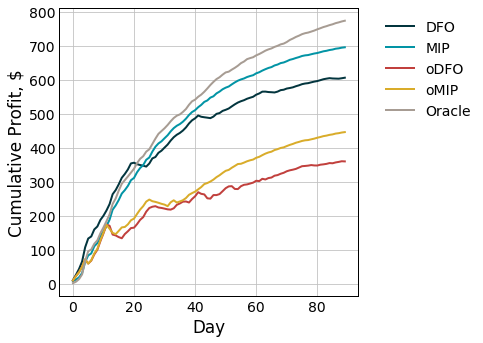

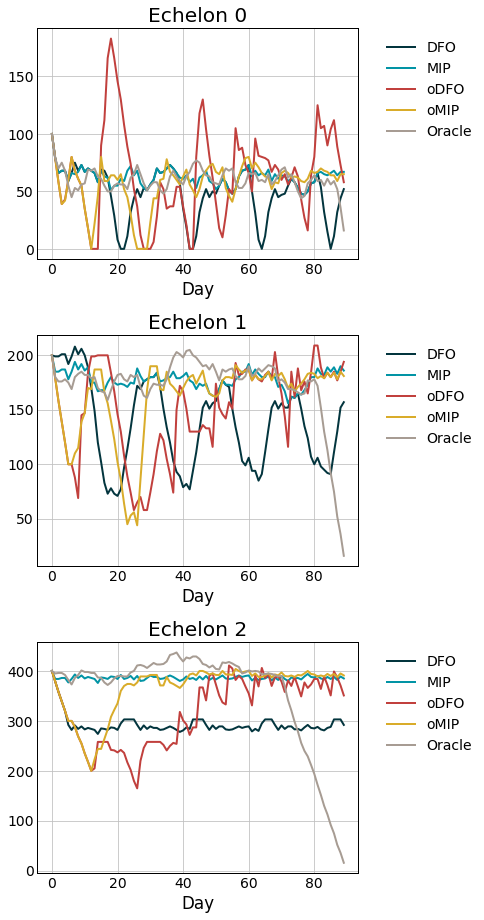

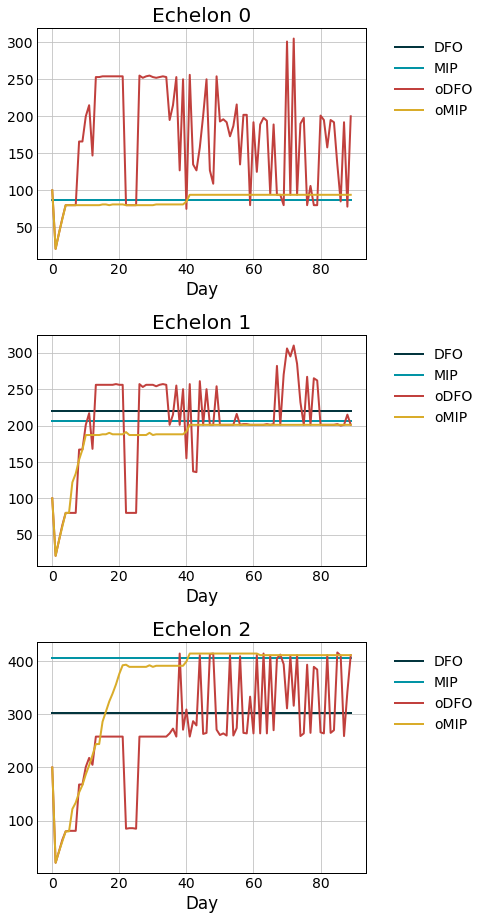

In [23]:
#extract pickle
import pickle
file_env_1 = open('NV_envs_LS_part1.obj','rb')
NV_envs_1 = pickle.load(file_env_1)
file_env_2 = open('NV_envs_LS_part2.obj','rb')
NV_envs_2 = pickle.load(file_env_2)
file_env_3 = open('NV_envs_LS_part3.obj','rb')
NV_envs_3 = pickle.load(file_env_3)
file_env_4 = open('NV_envs_LS_part4.obj','rb')
NV_envs_4 = pickle.load(file_env_4)
NV_envs = {}
NV_envs.update(NV_envs_1)
NV_envs.update(NV_envs_2)
NV_envs.update(NV_envs_3)
NV_envs.update(NV_envs_4)

env1_dfo = NV_envs['DFO']
env1_mip = NV_envs['MIP']
env1_dfo_online = NV_envs['oDFO']
env1_mip_online = NV_envs['oMIP']
env1_mip_pi = NV_envs['Oracle']

#plot results for backlog scenario

#profit
fig = plt.figure(figsize=[7,5])
plt.plot(np.cumsum(env1_dfo.P),label='DFO')
plt.plot(np.cumsum(env1_mip.P),label='MIP')
plt.plot(np.cumsum(env1_dfo_online.P),label='oDFO')
plt.plot(np.cumsum(env1_mip_online.P),label='oMIP')
plt.plot(np.cumsum(env1_mip_pi.P),label='Oracle')
plt.xlabel('Day')
plt.ylabel('Cumulative Profit, $')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('NewsVendor_LostSales.png')
plt.show()

#base stock levels
N = env1_dfo.num_periods
M = env1_dfo.num_stages

def inventory_position(I,T,B,stage):
    return np.sum(I[:-1,:stage+1] + T[:-1,:stage+1] - np.row_stack((np.zeros(stage+1),B[:-1,:i+1])),axis=1)

fig, axs = plt.subplots(3,1,figsize=[7,13])
axs = axs.ravel()
for i in range(M-1):
    axs[i].set_title('Echelon %i' %i)
    axs[i].set_xlabel('Day')
    
    #plot actual inventory positions
    axs[i].plot(inventory_position(I = env1_dfo.I, T = env1_dfo.T, B = env1_dfo.B, stage = i),label='DFO')
    axs[i].plot(inventory_position(I = env1_mip.I, T = env1_mip.T, B = env1_mip.B, stage = i),label='MIP')
    axs[i].plot(inventory_position(I = env1_dfo_online.I, T = env1_dfo_online.T, B = env1_dfo_online.B, stage = i),label='oDFO')
    axs[i].plot(inventory_position(I = env1_mip_online.I, T = env1_mip_online.T, B = env1_mip_online.B, stage = i),label='oMIP')
    axs[i].plot(inventory_position(I = env1_mip_pi.I, T = env1_mip_pi.T, B = env1_mip_pi.B, stage = i),label='Oracle')
    axs[i].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('NewsVendor_LostSales_inventory.png')
plt.show()

NV_envs['oDFO zopt']=np.array([list(NV_envs['oDFO zopt'][i]) for i in range(len(NV_envs['oDFO zopt']))])
NV_envs['oMIP zopt']=np.array([list(NV_envs['oMIP zopt'][i]) for i in range(len(NV_envs['oMIP zopt']))])

fig, axs = plt.subplots(3,1,figsize=[7,13])
axs = axs.ravel()
for i in range(M-1):
    axs[i].set_title('Echelon %i' %i)
    axs[i].set_xlabel('Day')

    #plot base stock levels
    axs[i].plot(NV_envs['DFO zopt'][i]*np.ones(N),label='DFO')
    axs[i].plot(NV_envs['MIP zopt'][i]*np.ones(N),label='MIP')
    axs[i].plot(NV_envs['oDFO zopt'][:,i],label='oDFO')
    axs[i].plot(NV_envs['oMIP zopt'][:,i],label='oMIP')
    axs[i].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('NewsVendor_LostSales_zopt.png')
plt.show()